**Multi Class Prediction of Obesity Risk**

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import sklearn.metrics as mt
import warnings
warnings.filterwarnings('ignore')


In [5]:
# Loading the Train dataset

train_df = pd.read_csv('/content/train.csv')

#Display train dataset
train_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [7]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [8]:
train_df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
# Removing ID column

train_df.drop('id', axis=1, inplace=True)

train_df


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [10]:
# Checking for null values
train_df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [11]:
#Converting the variables into a numeric format that machine learning algorithms can understand.
label_encoder = LabelEncoder()

# Fit label encoder and transform data

for col_name in train_df.columns:
    if train_df[col_name].dtype == "object":
        train_df[col_name] = label_encoder.fit_transform(train_df[[col_name]])

train_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,4
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,2,0,2.151809,0,1.330519,0.196680,1,3,3
20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,1,0,1.000000,0,2.000000,1.000000,1,3,0
20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,2,0,2.000000,0,1.158040,1.198439,2,3,3
20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,2,0,2.144838,0,0.000000,0.973834,2,0,6


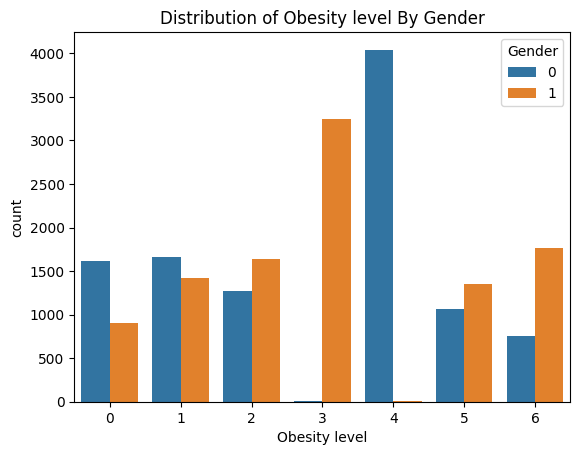

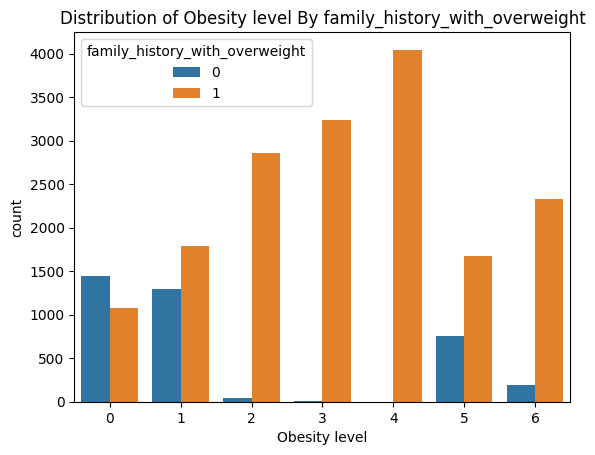

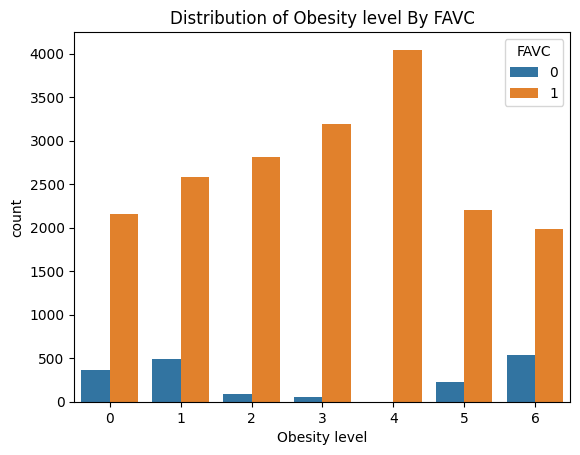

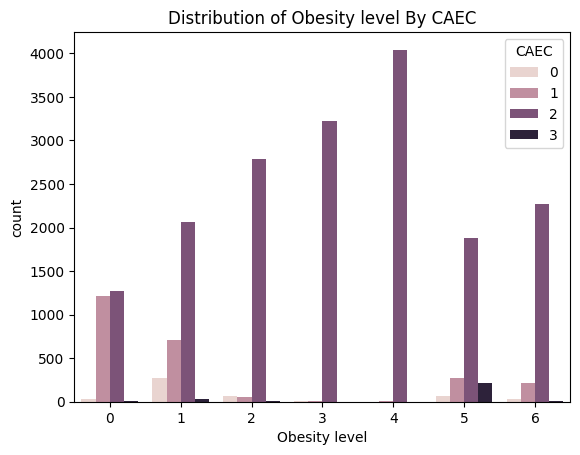

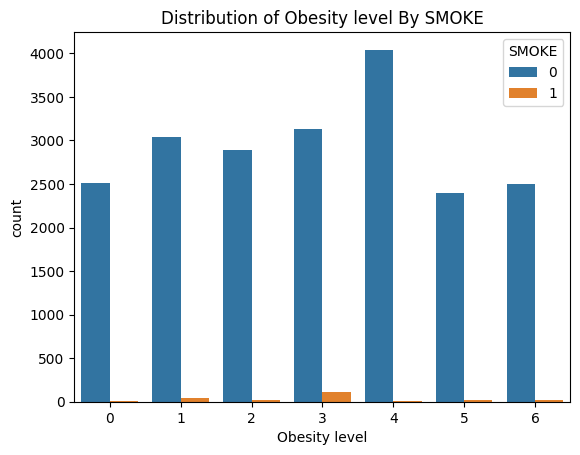

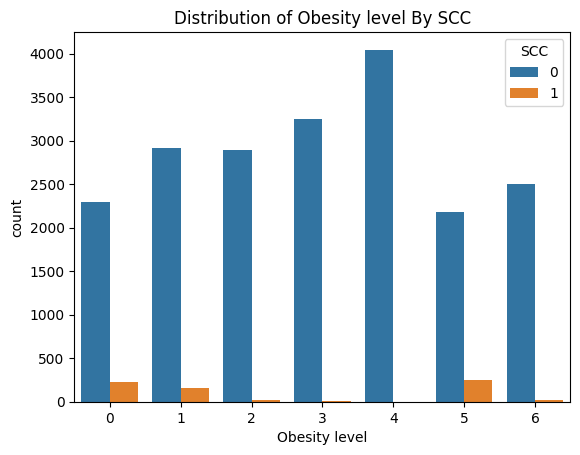

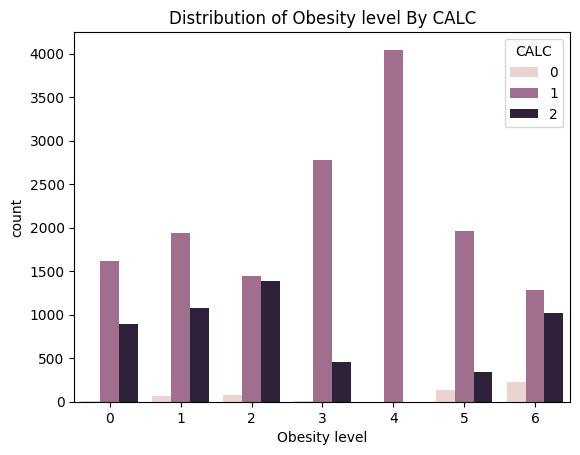

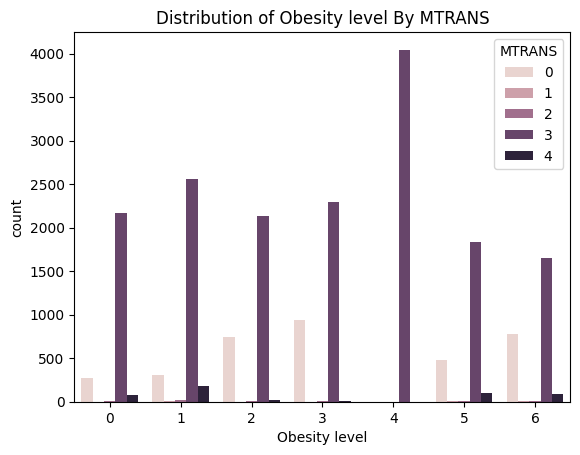

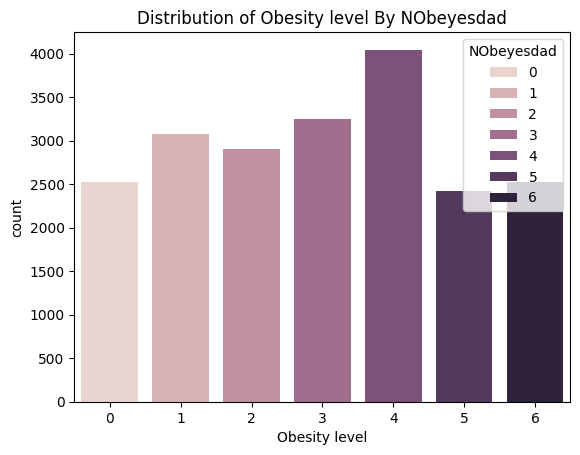

In [12]:
# prompt: Using dataframe train_df:  Create bar chart to see the distributions of Obesity level in 'Categoric features'

categoric_features = train_df[['Gender', 'family_history_with_overweight',
       'FAVC', 'CAEC', 'SMOKE', 'SCC','CALC', 'MTRANS', 'NObeyesdad']]

for feature in categoric_features:
    sns.countplot(data=train_df, x='NObeyesdad', hue=feature)

    # Add some text for labels, title
    plt.xlabel('Obesity level')
    plt.title(f'Distribution of Obesity level By {feature}')
    plt.show()

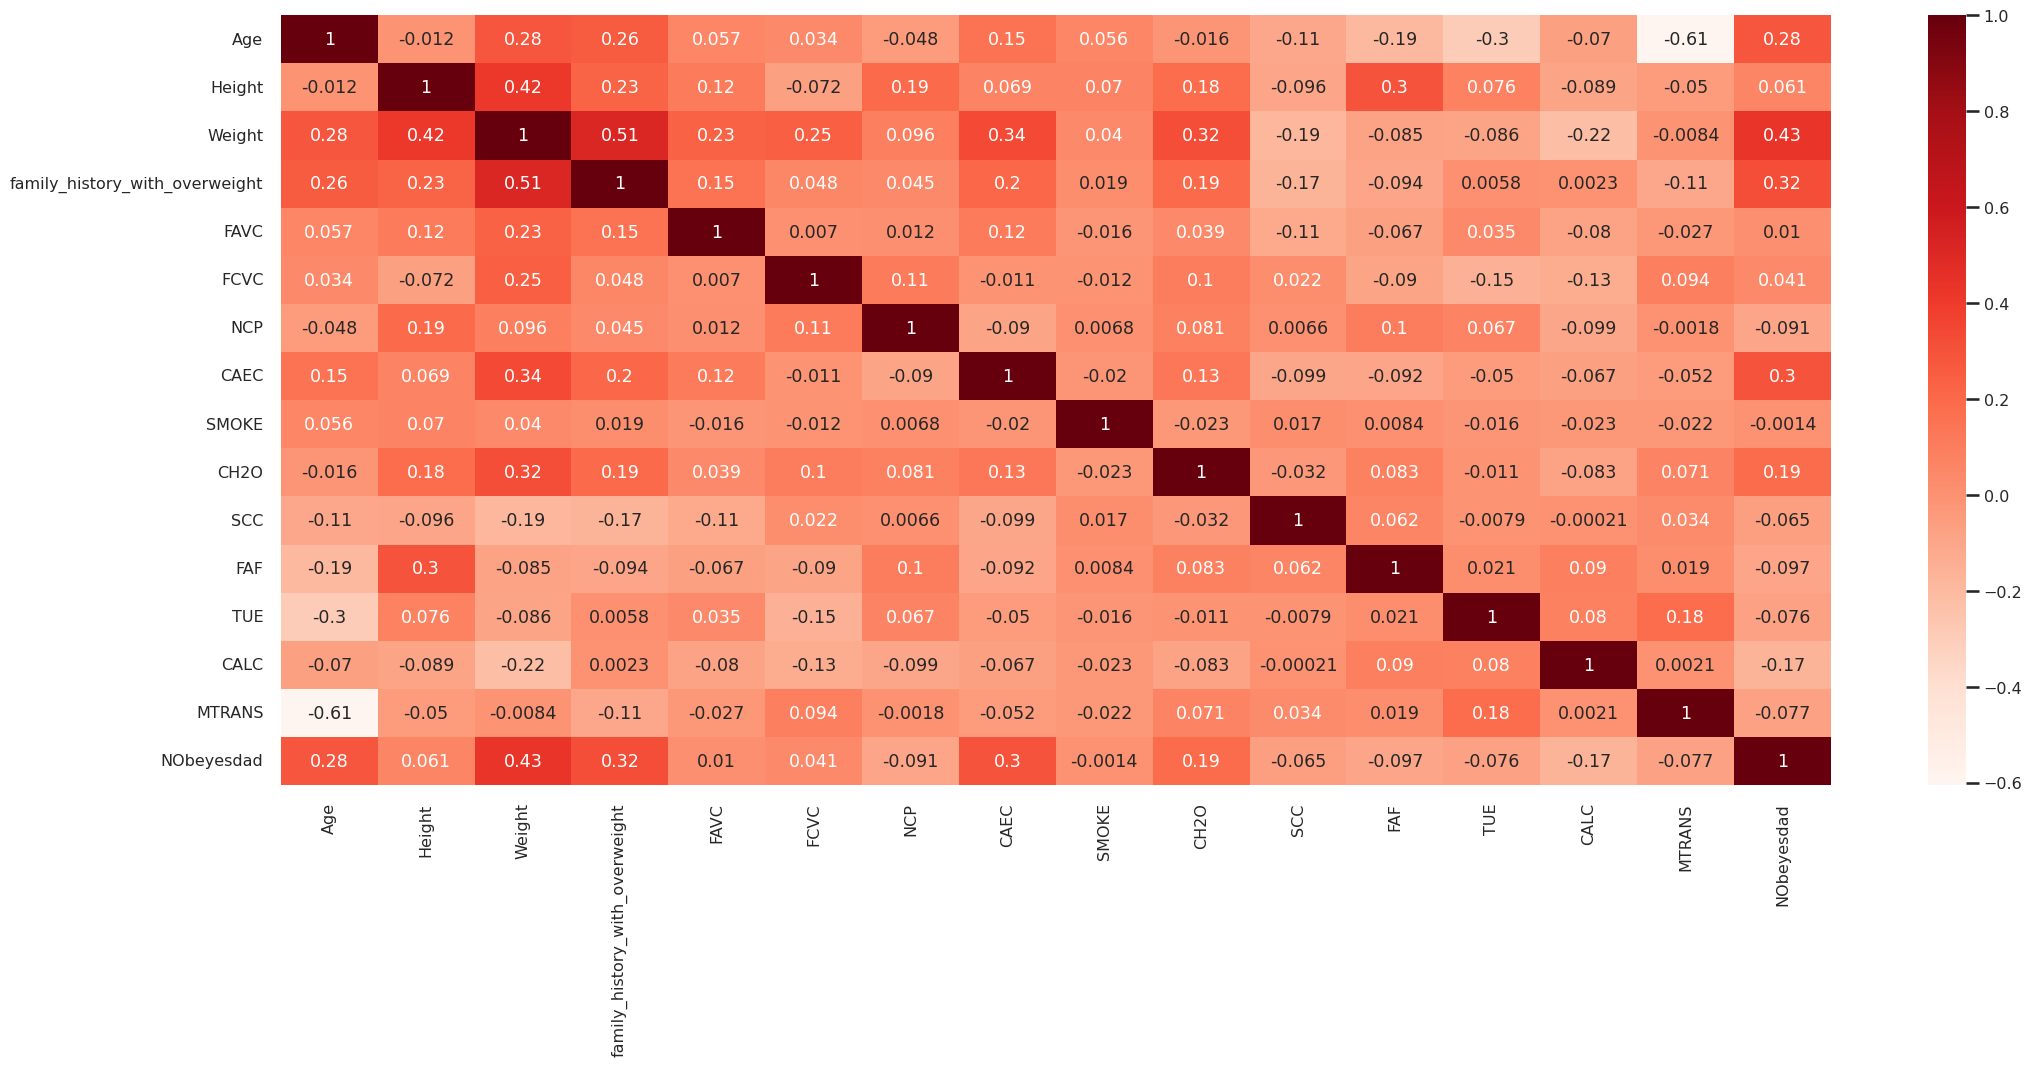

In [13]:
#
sns.set(rc={'figure.figsize':(25,10)})
sns.set_context("talk", font_scale=0.7)
sns.heatmap(train_df.iloc[:,1:].corr(), cmap='Reds', annot=True);


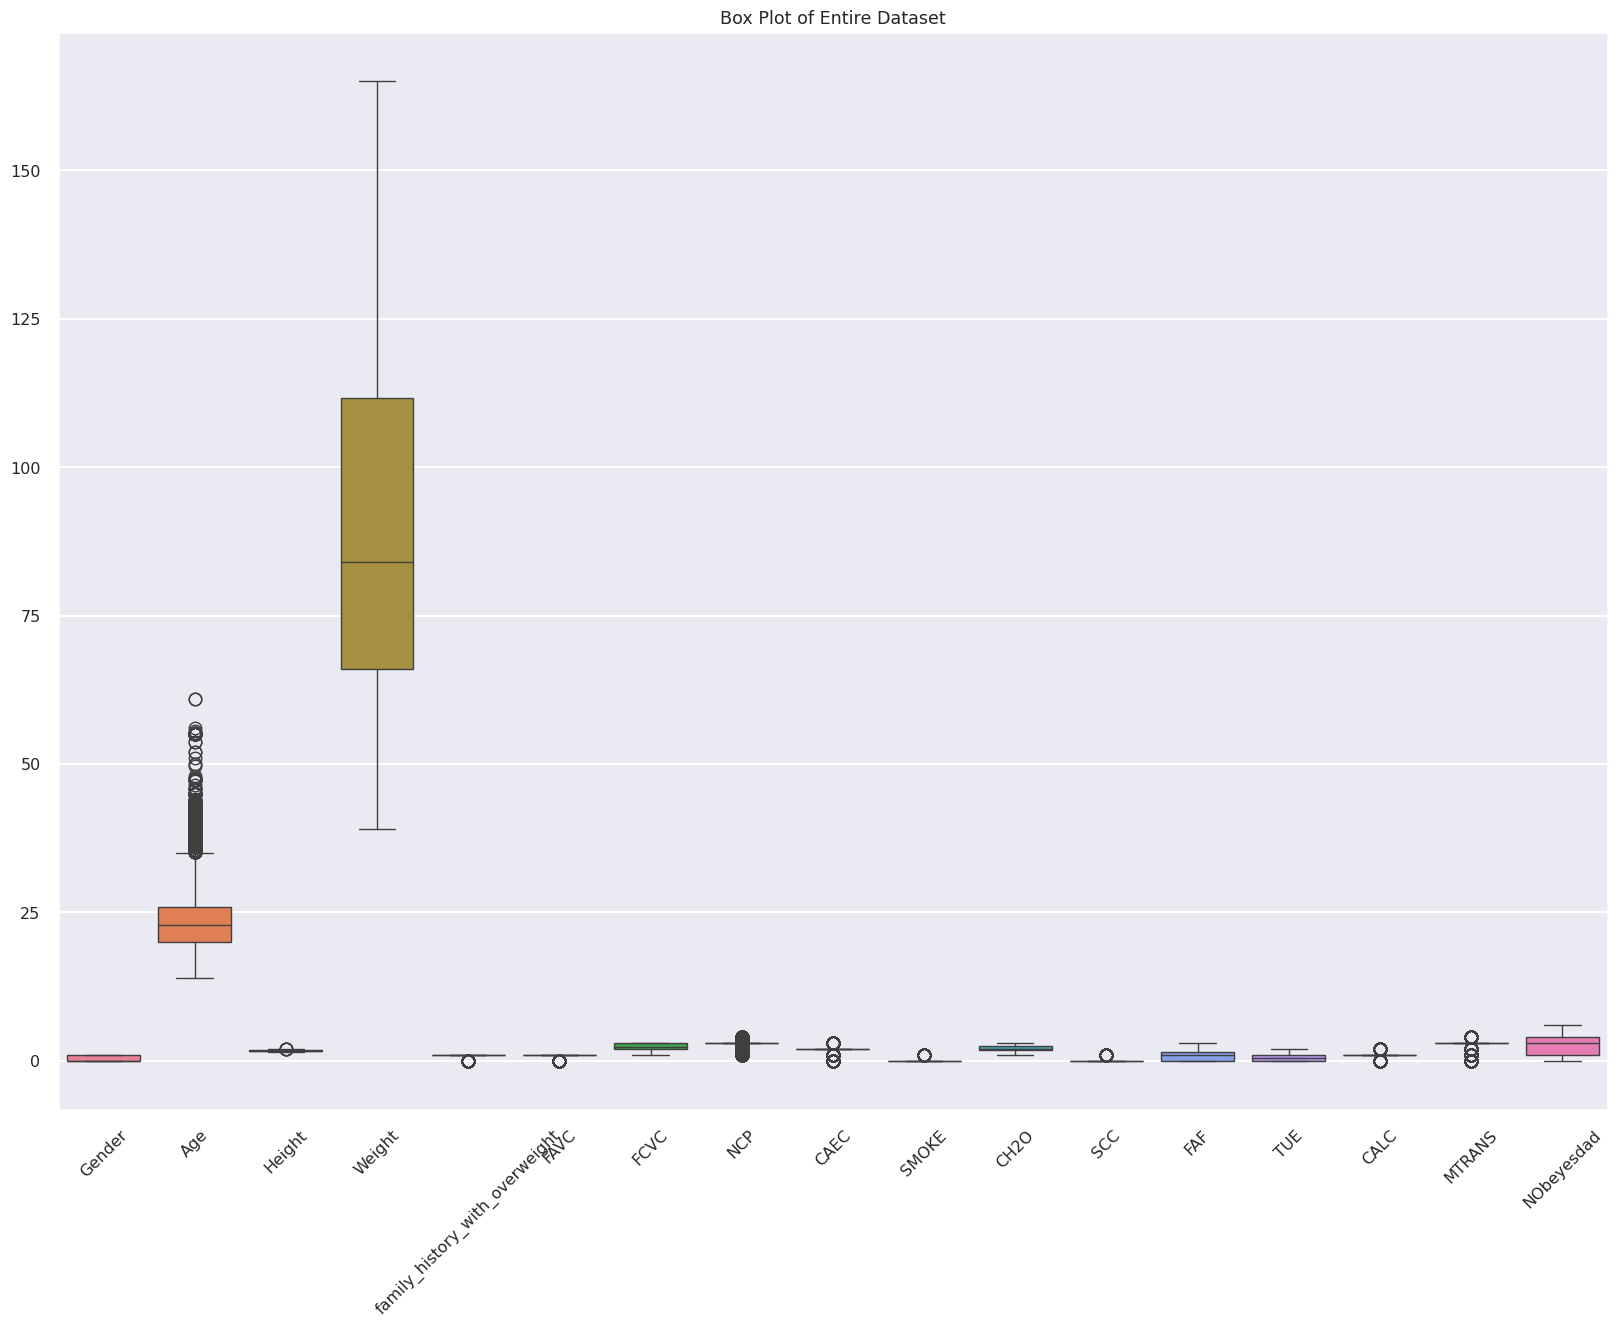

In [14]:
plt.figure(figsize=(20, 14))
sns.boxplot(data=train_df)
plt.title('Box Plot of Entire Dataset')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [15]:
# Min-Max Scaling
scaler_minmax = MinMaxScaler()
data_minmax = scaler_minmax.fit_transform(train_df)
data_minmax

array([[1.        , 0.22219172, 0.47558607, ..., 0.5       , 0.75      ,
        1.        ],
       [0.        , 0.08510638, 0.20925954, ..., 1.        , 0.        ,
        0.16666667],
       [0.        , 0.08510638, 0.49739091, ..., 1.        , 0.75      ,
        0.        ],
       ...,
       [1.        , 0.12980906, 0.70303027, ..., 1.        , 0.75      ,
        0.5       ],
       [1.        , 0.42240326, 0.47558987, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.26979523, 0.69730417, ..., 0.5       , 0.75      ,
        0.5       ]])

In [33]:
# Spliting the data set


X = train_df.drop('NObeyesdad', axis = 1)
y = train_df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
9958,1,17.000000,1.770000,97.000000,1,1,3.0,3.000000,0,0,2.000000,0,3.000000,1.0,2,0
7841,1,22.667596,1.753389,54.877111,1,1,2.0,4.000000,2,0,2.000000,0,2.000000,1.0,2,3
9293,1,21.838323,1.819867,122.024954,1,1,3.0,2.880817,2,0,1.645338,0,0.739881,0.0,1,3
15209,0,41.000000,1.580000,80.000000,1,1,2.0,3.000000,2,0,1.000000,0,0.000000,0.0,1,0
16515,1,23.000000,1.800000,95.000000,1,0,3.0,3.000000,2,0,3.000000,0,2.000000,1.0,0,3


In [17]:
# Initialize models and their parameters

lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svm = SVC()

In [18]:
# Logistic Regression

lr.fit(X_train,y_train)

LogisticRegression()

In [19]:
# Fitting the model and evaluation

lr_y_pred = lr.predict(X_test)

mt.accuracy_score(y_test,lr.predict(X_test))

0.6803949903660886

In [20]:
# Decision Tree Classifier

dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
#Fitting the model and evaluation

dtc_y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, dtc_y_pred)
precision = precision_score(y_test, dtc_y_pred, average = 'weighted')
recall = recall_score(y_test, dtc_y_pred, average = 'weighted')
f1 = f1_score(y_test, dtc_y_pred, average = 'weighted')

print(f"Accuracy: {accuracy}\n\nPrecision: {precision}\n\nRecall: {recall}\n\nF1: {f1}")

Accuracy: 0.8504335260115607

Precision: 0.8506150262649828

Recall: 0.8504335260115607

F1: 0.8504672961619598


In [22]:
# Random Forest Classifier

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
#Fitting the model and evaluation

rfc_y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, rfc_y_pred)
precision = precision_score(y_test, rfc_y_pred, average = 'weighted')
recall = recall_score(y_test, rfc_y_pred, average = 'weighted')
f1 = f1_score(y_test, rfc_y_pred, average = 'weighted' )

print(f"Accuracy: {accuracy}\n\nPrecision: {precision}\n\nRecall: {recall}\n\nF1: {f1}")

Accuracy: 0.898121387283237

Precision: 0.8983003790002106

Recall: 0.898121387283237

F1: 0.8981321156812379


In [24]:
# SVM

svm.fit(X_train, y_train)

SVC()

In [25]:
svm_y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, svm_y_pred)
precision = precision_score(y_test, svm_y_pred, average = 'weighted')
recall = recall_score(y_test, svm_y_pred, average = 'weighted')
f1 = f1_score(y_test, svm_y_pred, average = 'weighted')

print(f"Accuracy: {accuracy}\n\nPrecision: {precision}\n\nRecall: {recall}\n\nF1: {f1}")

Accuracy: 0.7138728323699421

Precision: 0.7269933947427409

Recall: 0.7138728323699421

F1: 0.7092997805026268


Hyperparameter Tuning

In [26]:
# Define hyperparameter grids for each model
lr_param_grid = {'C': uniform(0.1, 10)}
dtc_param_grid = {'max_depth': randint(1, 10), 'min_samples_split': randint(2, 20)}
rfc_param_grid = {'n_estimators': randint(50, 200), 'max_depth': randint(1, 20), 'min_samples_split': randint(2, 20)}
svm_param_grid = {'C': uniform(0.1, 10), 'gamma': uniform(0.01, 1)}

# Initialize models
lr = LogisticRegression(max_iter=1000)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svm = SVC()

# Perform Randomized Search for each model
random_search_lr = RandomizedSearchCV(lr, lr_param_grid, n_iter=2, cv=5, scoring='accuracy', random_state=42)
random_search_dtc = RandomizedSearchCV(dtc, dtc_param_grid, n_iter=2, cv=5, scoring='accuracy', random_state=42)
random_search_rfc = RandomizedSearchCV(rfc, rfc_param_grid, n_iter=2, cv=5, scoring='accuracy', random_state=42)
random_search_svm = RandomizedSearchCV(svm, svm_param_grid, n_iter=2, cv=5, scoring='accuracy', random_state=42)

# Fit Randomized Search for each model
random_search_lr.fit(X_train, y_train)
random_search_dtc.fit(X_train, y_train)
random_search_rfc.fit(X_train, y_train)
random_search_svm.fit(X_train, y_train)

# Get best models
best_lr = random_search_lr.best_estimator_
best_dtc = random_search_dtc.best_estimator_
best_rfc = random_search_rfc.best_estimator_
best_svm = random_search_svm.best_estimator_

# Evaluate best models
best_models = {
    'Logistic Regression': best_lr,
    'Decision Tree': best_dtc,
    'Random Forest': best_rfc,
    'SVM': best_svm
}

best_results = {}
for name, model in best_models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    best_results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Print best results
for name, results in best_results.items():
    print(f'{name}: {results}')

Logistic Regression: {'Accuracy': 0.8335741811175337, 'Precision': 0.8295522151792458, 'Recall': 0.8335741811175337, 'F1 Score': 0.8311535038021824}
Decision Tree: {'Accuracy': 0.8730732177263969, 'Precision': 0.8746909965117325, 'Recall': 0.8730732177263969, 'F1 Score': 0.8736545232192092}
Random Forest: {'Accuracy': 0.880057803468208, 'Precision': 0.8815867216958114, 'Recall': 0.880057803468208, 'F1 Score': 0.879280514952518}
SVM: {'Accuracy': 0.816233140655106, 'Precision': 0.8281860768956721, 'Recall': 0.816233140655106, 'F1 Score': 0.8179517823400789}


In [27]:
# Find the model with the highest accuracy
best_model_name = max(best_results, key=lambda x: best_results[x]['Accuracy'])

# Print the best-performing model and its results
print("Best Model:", best_model_name)
print("Accuracy:", best_results[best_model_name]['Accuracy'])
print("Precision:", best_results[best_model_name]['Precision'])
print("Recall:", best_results[best_model_name]['Recall'])
print("F1 Score:", best_results[best_model_name]['F1 Score'])

Best Model: Random Forest
Accuracy: 0.880057803468208
Precision: 0.8815867216958114
Recall: 0.880057803468208
F1 Score: 0.879280514952518


In [29]:
# Loading the test data

test_df = pd.read_csv('/content/test.csv')

#Display train dataset
test_df


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [30]:
# Removing ID column

test_df.drop('id', axis=1, inplace=True)

test_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [34]:
#Converting the variables into a numeric format that machine learning algorithms can understand.
label_encoder_test = LabelEncoder()

# Fit label encoder and transform data

for col_name in test_df.columns:
    if test_df[col_name].dtype == "object":
        test_df[col_name] = label_encoder.fit_transform(test_df[[col_name]])

test_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,2,3
1,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,2,3
2,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,2,3
3,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,2,3
4,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,1,23.327836,1.721384,78.030383,1,0,2.813234,3.000000,2,0,1.000000,0,0.807076,0.778632,2,3
13836,0,29.000000,1.590000,62.000000,0,1,3.000000,3.000000,2,0,2.000000,0,0.000000,0.000000,2,3
13837,0,22.935612,1.585547,44.376637,0,1,3.000000,2.273740,1,0,2.000000,0,1.949840,1.000000,2,3
13838,1,21.000000,1.620000,53.000000,1,1,2.000000,3.000000,2,0,2.000000,0,3.000000,2.000000,3,3


Testing the Best Models on our test dataset

In [73]:
#Initializing and Comparing the perfomance of the models

def train_and_predict(X_train, y_train, X_test, y_test):
    # Initialize models
    models = {
        'Logistic Regression': best_lr,
    'Decision Tree': best_dtc,
    'Random Forest': best_rfc,
    'SVM': best_svm
    }

    # Initialize empty dictionaries to store results
    train_results = {}
    test_results = {}

    # Loop through each model
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predict the target variable on the training and test data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate evaluation metrics for both datasets
        train_metrics = {
            'Accuracy': accuracy_score(y_train, y_train_pred),
            'Precision': precision_score(y_train, y_train_pred, average = 'weighted'),
            'Recall': recall_score(y_train, y_train_pred, average = 'weighted'),
            'F1 Score': f1_score(y_train, y_train_pred, average = 'weighted')
        }

        test_metrics = {
            'Accuracy': accuracy_score(y_test, y_test_pred),
            'Precision': precision_score(y_test, y_test_pred, average = 'weighted'),
            'Recall': recall_score(y_test, y_test_pred, average = 'weighted'),
            'F1 Score': f1_score(y_test, y_test_pred, average = 'weighted')
        }

        # Store the results in the dictionaries
        train_results[name] = train_metrics
        test_results[name] = test_metrics

    # Convert results to DataFrames for easier comparison
    train_df = pd.DataFrame(train_results).T
    test_df = pd.DataFrame(test_results).T

    return train_df, test_df



# Display both test and train results

train_results, test_results = train_and_predict(X_train, y_train, X_test, y_test)
print("Training Data Results:")
print(train_results)
print("\nTest Data Results:")
print(test_results)

Training Data Results:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.830182   0.826360  0.830182  0.827757
Decision Tree        0.891605   0.891851  0.891605  0.891542
Random Forest        0.899615   0.900809  0.899615  0.898424
SVM                  0.993858   0.993855  0.993858  0.993855

Test Data Results:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.833574   0.829552  0.833574  0.831154
Decision Tree        0.873073   0.874691  0.873073  0.873655
Random Forest        0.883430   0.884151  0.883430  0.882524
SVM                  0.816233   0.828186  0.816233  0.817952


**Conclusion:**

In this study, we developed and evaluated machine learning models to predict the risk of obesity among individuals based on a comprehensive set of features. Our analysis reveals several key findings:

1. **Model Performance**: Our models demonstrated promising performance in predicting obesity risk with our Best Model: Random Forest achieving
Accuracy: 0.880057803468208
Precision: 0.8815867216958114
Recall: 0.880057803468208
F1 Score: 0.879280514952518

2. **Important Features**: The most important features for predicting obesity risk include Height & Weight features present which had the highest correlation.A relevant insight from data is that the second more correlated feature with Weight is CH2O with 0.32, from where we can describe weight increase based on CH2O consumption. In contrast the third more correlated features with Weight is FCVC with 0.25. After the model training and reviewing the feature importance we can note that in general FCVC is more important for the models decision than CH2O, actuallly CH2O presents no relevance and FCVC is the second most relevant feature after Weight.These factors play a crucial role in determining an individual's susceptibility to obesity and can inform targeted interventions.

3. **Limitations**: Despite the promising results, our study has several limitations. The dataset used may not fully capture all relevant factors influencing obesity risk, and there may be inherent biases or confounding variables that could affect model predictions.

4. **Future Directions**: Future research should focus on refining our models by incorporating additional data sources, such as genetic information or environmental factors. Additionally, interventions targeted towards high-risk populations identified in our study could help mitigate the burden of obesity and its associated health complications.

In conclusion, our study provides valuable insights into the prediction of obesity risk using machine learning techniques. By understanding the factors contributing to obesity and identifying at-risk populations, we can develop more effective strategies for prevention and intervention, ultimately promoting better health outcomes for individuals and communities.
